In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# COMBAT


In [8]:
dataset = "combat"

metadata = pd.read_csv(f"../data/{dataset}/{dataset}_metadata.csv")
metadata

,scRNASeq_sample_ID,Source,Outcome,Death28,Institute,Pool_ID,Age,Sex,BMI,Hospitalstay,...,Annotation_major_subset_MAIT,Annotation_major_subset_Mast,Annotation_major_subset_NK,Annotation_major_subset_PB,Annotation_major_subset_PLT,Annotation_major_subset_RET,Annotation_major_subset_cMono,Annotation_major_subset_iNKT,Annotation_major_subset_ncMono,split
0,S00109-Ja001E-PBCa,COVID_SEV,2.0,0,Oxford,gPlexA,5.0,1,5,1.0,...,1.004016,0.000000,20.682731,2.459839,0.075301,0.025100,28.664659,0.050201,1.079317,val
1,S00112-Ja003E-PBCa,COVID_MILD,5.0,0,Oxford,gPlexA,5.0,1,5,2.0,...,0.352113,0.000000,7.624594,2.816901,0.067714,0.000000,23.171723,0.013543,2.559588,val
2,S00005-Ja005E-PBCa,COVID_CRIT,2.0,0,Oxford,gPlexA,7.0,0,1,4.0,...,0.288825,0.000000,4.598978,1.832926,0.444346,0.000000,2.777161,0.000000,0.444346,val
3,S00061-Ja003E-PBCa,COVID_SEV,4.0,0,Oxford,gPlexA,5.0,1,5,2.0,...,0.327256,0.000000,8.952782,1.005143,0.116877,0.000000,43.010753,0.023375,3.295933,val
4,S00056-Ja003E-PBCa,COVID_SEV,3.0,0,Oxford,gPlexA,7.0,0,5,3.0,...,0.039474,0.026316,5.263158,1.131579,0.236842,0.000000,39.960526,0.013158,2.486842,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,S00065-Ja003E-PBCa,COVID_CRIT,2.0,0,Oxford,gPlexK,5.0,0,5,3.0,...,0.050968,0.025484,3.211009,0.433231,0.127421,0.025484,38.863405,0.025484,4.306830,train
134,S00048-Ja003E-PBCa,COVID_SEV,4.0,0,Oxford,gPlexK,7.0,1,3,2.0,...,0.029036,0.000000,3.135889,1.596980,0.000000,0.000000,23.228804,0.058072,0.871080,train
135,G05112-Ja005E-PBCa,COVID_HCW_MILD,6.0,0,Oxford,gPlexK,4.0,0,5,NaN,...,0.135379,0.000000,3.249097,0.473827,0.000000,0.000000,27.098375,0.000000,5.956679,train
136,N00038-Ja001E-PBGa,Sepsis,NaN,0,Oxford,gPlexK,4.0,1,5,0.0,...,1.430536,0.000000,10.000000,0.096286,0.990371,0.000000,20.013755,0.000000,5.639615,train


In [9]:
metadata.groupby("split").describe()["n_cells"]

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
train,111.0,5512.117117,2363.676380,872.0,3786.0,5672.0,7005.0,13918.0
val,27.0,6364.148148,2959.153123,161.0,4131.0,6093.0,8646.5,10781.0


In [13]:
metadata[metadata["n_cells"] < 1500].shape[0]

7

# Stephenson

In [16]:
dataset = "stephenson"
metadata = pd.read_csv(f"../data/{dataset}/{dataset}_metadata.csv")
metadata

,sample_id,Resample,Collection_Day,Swab_result,Status,Smoker,Status_on_day_collection,Status_on_day_collection_summary,Days_from_onset,Site,...,cell_type_CD14-positive monocyte,"cell_type_dendritic cell, human",cell_type_malignant cell,"cell_type_erythroid progenitor cell, mammalian","cell_type_ILC1, human","cell_type_group 2 innate lymphoid cell, human",cell_type_T follicular helper cell,"cell_type_CD14-low, CD16-positive monocyte",cell_type_hematopoietic precursor cell,split
0,MH9179824,Initial,0,Positive,Covid,Non-smoker,Ward_O2,Moderate,8.0,Ncl,...,22.327849,0.280317,0.0,0.000000,0.060938,0.000000,1.279707,0.463132,0.000000,val
1,newcastle65,Initial,0,Healthy,Healthy,Not_known,Healthy,Healthy,NaN,Ncl,...,7.320955,0.742706,0.0,0.106101,0.035367,0.035367,0.495137,0.212202,0.000000,val
2,MH9143327,Initial,0,Positive,Covid,Non-smoker,Ward_O2,Moderate,8.0,Ncl,...,38.028169,0.495386,0.0,0.106848,0.077708,0.019427,0.388538,0.961632,0.058281,val
3,MH9143326,Initial,0,Positive,Covid,Non-smoker,Ward_O2,Moderate,20.0,Ncl,...,52.479418,0.459506,0.0,0.057438,0.057438,0.000000,0.268045,5.475780,0.009573,train
4,MH9143325,Initial,0,Positive,Covid,Non-smoker,ITU_NIV,Severe,7.0,Ncl,...,22.386074,0.277193,0.0,0.077614,0.077614,0.011088,1.995787,0.210666,0.000000,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,BGCV14_CV0050,Resample,28,Positive,Covid,Non-smoker,Ward_noO2,Mild,11.0,Cambridge,...,3.040354,1.271421,0.0,0.000000,0.000000,0.000000,3.482587,0.000000,0.000000,train
127,BGCV15_CV0944,Initial,0,Negative,Healthy,Not_known,Healthy,Healthy,NaN,Cambridge,...,4.574132,0.157729,0.0,0.157729,0.000000,0.000000,3.785489,0.000000,0.000000,train
128,BGCV15_CV0176,Resample,28,Positive,Covid,Non-smoker,ITU_O2,Severe,24.0,Cambridge,...,2.014652,0.183150,0.0,0.000000,0.000000,0.000000,2.014652,0.000000,0.000000,train
129,BGCV15_CV0257,Resample,28,Positive,Covid,Non-smoker,Ward_O2,Moderate,13.0,Cambridge,...,1.543210,0.617284,0.0,0.000000,0.000000,0.000000,1.543210,0.000000,0.000000,train


In [18]:
metadata[metadata["sample_id"] == "MH8919226"]["n_cells"]

8    1190
Name: n_cells, dtype: int64

In [15]:
metadata.groupby("split").describe()["n_cells"]

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
train,104.0,4430.817308,3178.486679,324.0,1940.75,3042.5,7037.0,14317.0
val,27.0,6617.666667,3361.237169,1190.0,3715.50,7011.0,8696.5,14086.0


# Onek1k

In [3]:
dataset = "onek1k"

metadata = pd.read_csv(f"../data/{dataset}/{dataset}_metadata.csv")
metadata

,donor_id,pool_number,age,sex,median_n_genes_by_counts,median_total_counts,median_pct_counts_mt,n_cells,cell_type_erythrocyte,cell_type_platelet,...,cell_type_mucosal invariant T cell,cell_type_plasmablast,cell_type_conventional dendritic cell,cell_type_CD14-positive monocyte,cell_type_innate lymphoid cell,"cell_type_CD14-low, CD16-positive monocyte",cell_type_double negative thymocyte,cell_type_hematopoietic precursor cell,cell_type_peripheral blood mononuclear cell,split
0,691_692,1,66,male,67.0,114.815960,0.0,1501,0.000000,0.466356,...,0.532978,0.000000,0.133245,1.665556,0.000000,0.732845,0.066622,0.000000,0.000000,val
1,693_694,1,88,female,76.0,158.309370,0.0,1289,0.310318,0.543057,...,0.930954,0.000000,0.000000,3.878976,0.000000,0.465477,0.077580,0.155159,0.000000,val
2,688_689,1,66,male,64.0,111.713135,0.0,1552,0.064433,0.000000,...,0.322165,0.064433,0.128866,2.255155,0.000000,0.773196,0.064433,0.064433,0.000000,val
3,683_684,1,78,male,72.0,138.811600,0.0,1455,0.274914,0.412371,...,0.618557,0.068729,0.206186,1.030928,0.068729,0.618557,0.000000,0.206186,0.000000,val
4,684_685,1,75,female,75.0,141.507060,0.0,1034,0.386847,0.290135,...,0.096712,0.096712,0.386847,3.771760,0.000000,1.740812,0.000000,0.096712,0.096712,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,840_841,9,75,female,64.0,106.154980,0.0,1565,0.063898,0.000000,...,0.127796,0.255591,0.063898,0.127796,0.000000,0.255591,0.319489,0.000000,0.000000,train
977,801_802,9,76,female,69.0,124.664340,0.0,1203,0.000000,0.000000,...,0.249377,0.332502,0.332502,0.332502,0.000000,0.332502,0.249377,0.166251,0.000000,train
978,797_798,9,75,female,62.0,105.816810,0.0,1431,0.069881,0.000000,...,0.000000,0.069881,0.069881,1.537386,0.000000,0.349406,0.000000,0.000000,0.000000,train
979,798_799,9,60,male,68.0,117.941260,0.0,883,0.113250,0.000000,...,0.566251,0.339751,0.453001,3.397508,0.000000,0.566251,0.226501,0.792752,0.000000,train


In [4]:
metadata.groupby("split").describe()["n_cells"]

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
train,903.0,1271.066445,327.542854,333.0,1069.0,1243.0,1440.0,3511.0
val,78.0,1297.525641,253.974624,724.0,1166.5,1293.0,1464.5,1955.0


# HLCA

In [5]:
dataset = "hlca"
metadata = pd.read_csv(f"../data/{dataset}/{dataset}_metadata.csv")
metadata

,donor_id,suspension_type,BMI,age_or_mean_of_age_range,age_range,anatomical_region_ccf_score,cause_of_death,core_or_extension,fresh_or_frozen,lung_condition,...,cell_type_lung neuroendocrine cell,cell_type_bronchial goblet cell,cell_type_pulmonary artery endothelial cell,cell_type_lung macrophage,cell_type_bronchus fibroblast of lung,cell_type_alveolar type 1 fibroblast cell,cell_type_alveolar adventitial fibroblast,cell_type_respiratory hillock cell,cell_type_unknown,split
0,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,NaN,55.0,NaN,0.97,intracranial hemorrhage,core,fresh,Healthy,...,0.000000,0.000000,1.096033,0.991649,0.078288,0.652401,0.052192,0.000000,0.000000,val
1,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,NaN,NaN,NaN,NaN,NaN,extension,NaN,Healthy,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355661,39.063426,val
2,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,23.5,41.0,NaN,0.97,NaN,core,fresh,Healthy,...,0.000000,0.012739,3.006369,0.840764,0.025478,0.764331,0.101911,0.000000,0.000000,val
3,homosapiens_None_2023_None_sikkemalisa_002_d10...,nucleus,NaN,0.0,NaN,NaN,NaN,extension,NaN,Healthy,...,0.020610,0.000000,0.412201,1.277824,1.483924,13.025556,0.103050,0.000000,38.582028,val
4,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,24.6,75.0,NaN,0.97,NaN,core,fresh,Healthy (tumor adjacent),...,0.026585,0.000000,3.588994,0.837432,0.026585,0.717799,1.821082,0.199389,0.000000,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,NaN,NaN,NaN,NaN,NaN,extension,NaN,Healthy,...,0.000000,0.000000,0.000000,0.000000,0.606061,0.606061,1.212121,0.000000,16.969697,train
390,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,NaN,76.0,NaN,NaN,NaN,extension,NaN,Healthy (tumor adjacent),...,0.000000,0.000000,0.000000,0.250627,0.000000,0.000000,0.000000,0.000000,37.593985,train
391,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,NaN,58.0,NaN,0.97,NaN,core,fresh,Healthy,...,0.000000,1.428571,7.857143,0.000000,0.000000,0.714286,3.571429,0.000000,0.000000,train
392,homosapiens_None_2023_None_sikkemalisa_002_d10...,cell,NaN,NaN,NaN,NaN,NaN,extension,NaN,Pneumonia non-COVID,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.043478,train


<Axes: xlabel='n_cells', ylabel='Count'>

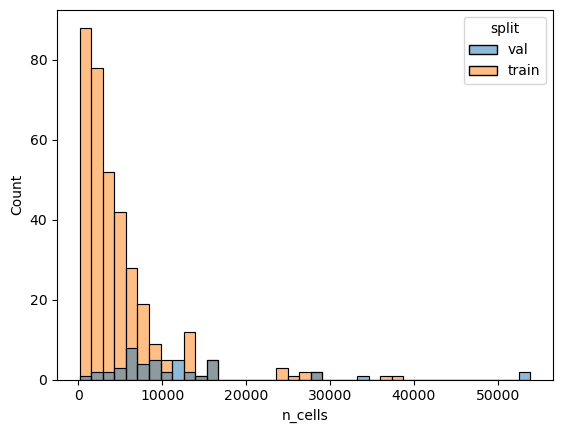

In [7]:
sns.histplot(metadata, x="n_cells", hue="split")

In [6]:
metadata.groupby("split").describe()["n_cells"]

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
train,349.0,4680.727794,5355.637164,140.0,1487.0,3236.0,5838.0,38486.0
val,45.0,12171.755556,11328.818516,310.0,6001.0,9508.0,12736.0,53904.0
